##**Context**

The production rates of cars have been rising progressively during the past decade, with almost 92 million cars
being produced in the year 2019. This big rise has allowed the used car market to now come
into the picture as a growing industry. The manufacture fixes the costs of recent cars within the industry together with some additional costs that are
incurred by the govt. majorly within the various types of taxes. So, customers that buy a replacement car remain
assured of the money that they invest to be righteous. But because of such increase in prices of the new
cars and therefore the inability of the many customers to shop for a replacement car thanks to the dearth of
sufficient funds, they like used cars which has resulted into a world increase within the sales of used cars.
Therefore, there's a necessity to possess a second hand car price prediction model to accurately determine the
worthiness of the car considering a range of features.

##**Problem statement**

A company named **Ucars** predicts the price of used cars. Lots of customers approach them to get an estimate of the price of the used car that they want to buy.  Let us consider you are a Data Scientist in the Ucars team developing the model that can predict the price of these used cars.

##**Data Dictionary**

We are using the cars dataset from Kaggle, and the description of the features is given below:

**Model**: The brand and model of the car

**Year**: The year or edition of the model

**Transmission**: The type of transmission used by the car (Automatic / Manual)

**Mileage**: The standard mileage offered by the car company in kmpl or km/kg

**Price**: The price of the car

**Color**: Color of the car

##Reading the Dataset

Let us start by uploading the dataset.

In [1]:
##from google.colab import files
##files.upload()

 Now, let us install the latest version of tensorflow.


In [2]:
!pip install tensorflow

##### Check the version of the installation

In [3]:
import tensorflow as tf
print(tf.__version__)

2.7.0


Now, let us import the data and necessary libraries and get it ready for modelling.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn     
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

cars_data = pd.read_csv('usedcars.csv')
cars_data

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO
...,...,...,...,...,...,...
145,2006,SES,6200,95000,Silver,AUTO
146,2002,SE,5995,87003,Red,AUTO
147,2000,SE,5980,96841,Red,AUTO
148,2001,SE,4899,151479,Yellow,AUTO


##Overview of Dataset

Let's check the null values in each column of the dataset

In [5]:
cars_data.isna().sum()

year            0
model           0
price           0
mileage         0
color           0
transmission    0
dtype: int64

* As you can see, there are no null values in any of the column

##Data Preprocessing



Let's check for the duplicate observations 

In [6]:
#just some basic preprocessing
cars_data.drop_duplicates()

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO
...,...,...,...,...,...,...
145,2006,SES,6200,95000,Silver,AUTO
146,2002,SE,5995,87003,Red,AUTO
147,2000,SE,5980,96841,Red,AUTO
148,2001,SE,4899,151479,Yellow,AUTO


Notice that the last three columns (color, Transmission, Model) are not numerical values, but categorical entries?

To utilise the columns, we’ll need to find a way to make them numerical, and a perfect technique is One-hot Encoding

In [7]:
#creating dummy variables for the categorical features
cars_ori=cars_data
cars_data = pd.get_dummies(cars_data,drop_first=True)
cars_data = cars_data.astype('float32') # we will need to convert the dataset to float in order to be able to convert it into tensors later.
cars_data

,year,price,mileage,model_SEL,model_SES,color_Blue,color_Gold,color_Gray,color_Green,color_Red,color_Silver,color_White,color_Yellow,transmission_MANUAL
0,2011.0,21992.0,7413.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2011.0,20995.0,10926.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011.0,19995.0,7351.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2011.0,17809.0,11613.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012.0,17500.0,8367.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2006.0,6200.0,95000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
146,2002.0,5995.0,87003.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
147,2000.0,5980.0,96841.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
148,2001.0,4899.0,151479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Exploring the column names

In [8]:
cars_data.columns

Index(['year', 'price', 'mileage', 'model_SEL', 'model_SES', 'color_Blue',
       'color_Gold', 'color_Gray', 'color_Green', 'color_Red', 'color_Silver',
       'color_White', 'color_Yellow', 'transmission_MANUAL'],
      dtype='object')

##Inspecting the data



##Univariate Analysis

It’s always good to get some insight about the target variable. The target or dependent variable is price in our case.


In [9]:
df=cars_data
print(df.price.mean())
print(df.price.median())


12961.93359375
13591.5


Mean is slightly  lesser than median which indicates there are few outliers or extreme values. Let’s also check maximum and minimum values:

In [10]:
print(df.price.max())
print(df.price.min())


21992.0
3800.0


In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

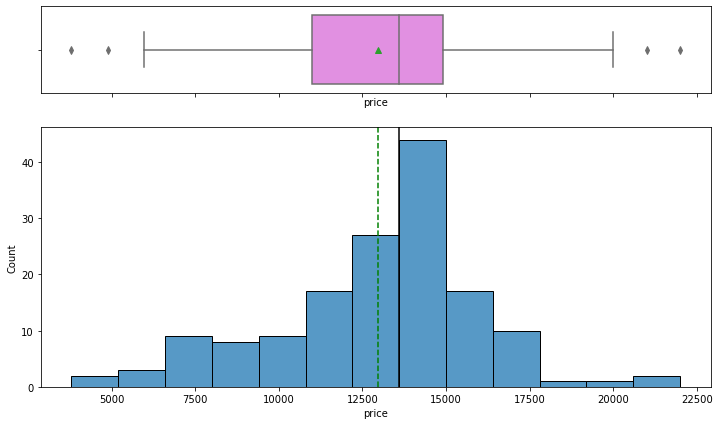

In [12]:
histogram_boxplot(df, "price")

It can be seen from the graph that the data is looking approx symmetric and the peak is around 10000-15000. Another way of checking the distribution and outliers is boxplot:

###Removing Outliers 

Dependent variable "price" contains  4 data points which are outliers. The loss function which will be used for regression is MSE and it tries to model the mean of the dependent variable. Having outliers in the response variable might give biased model. Let's remove these data points .





In [13]:
#Removing the outlier datapoints because these point might disrupt the modelling
df.drop(df[df.price>20000].index,inplace=True,axis=0)


In [14]:
#printing the dataframe
cars_data=df
df

,year,price,mileage,model_SEL,model_SES,color_Blue,color_Gold,color_Gray,color_Green,color_Red,color_Silver,color_White,color_Yellow,transmission_MANUAL
2,2011.0,19995.0,7351.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2011.0,17809.0,11613.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012.0,17500.0,8367.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,2010.0,17495.0,25125.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,2011.0,17000.0,27393.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2006.0,6200.0,95000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
146,2002.0,5995.0,87003.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
147,2000.0,5980.0,96841.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
148,2001.0,4899.0,151479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


##Bivariate analysis

Manual and Automatic Cars

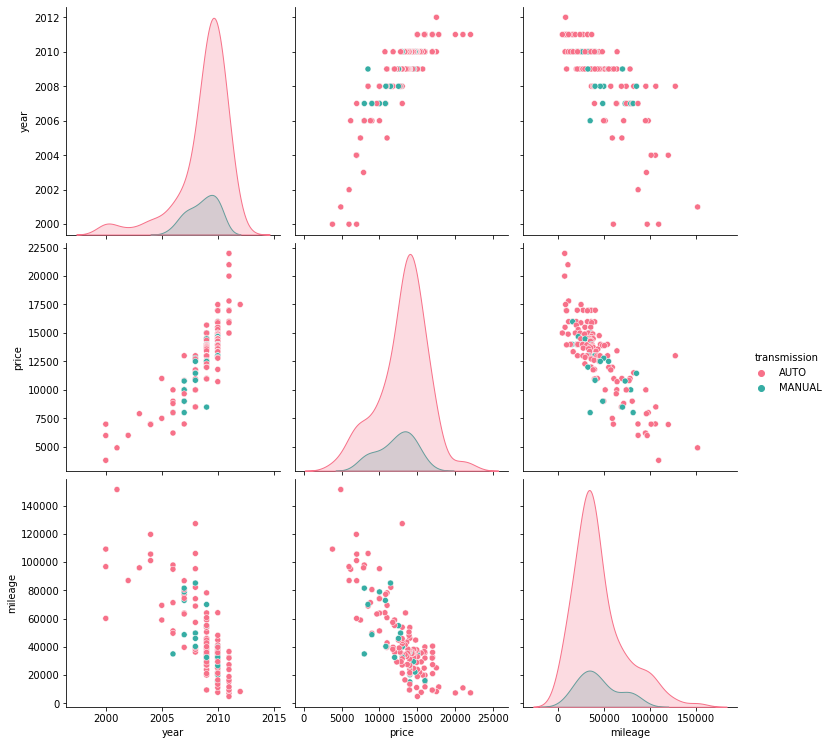

In [15]:
sns.pairplot(cars_ori,hue = 'transmission',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

We can see that automatic cars have higher price range than manual type cars though the distribution of automatic cars were skewed to the right. We can also see the increament in price of automatic cars between 2010 and 2015. 

Let’s try to have a quick look at the joint distribution of a few pairs of columns from the training set.

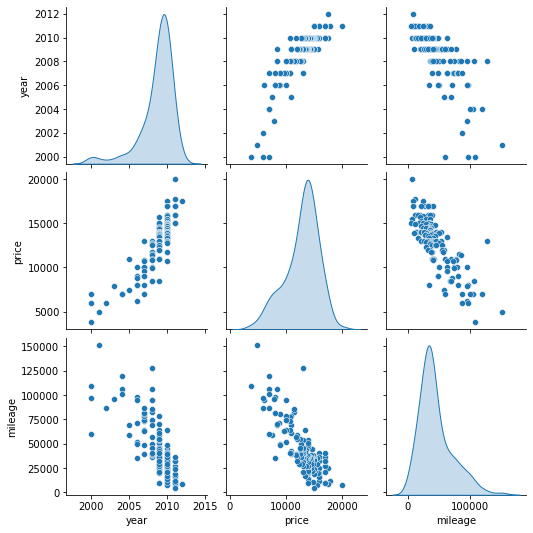

In [16]:
sns.pairplot(cars_data[['year', 'price', 'mileage']], diag_kind="kde")

* year and price have some amount of linear relationship which means cars which are manufactured recently are costly

* price and mileage is having linear relationship with negative slope which means costly cars have less mileage



Lets visualize  the correlation between the features 

<AxesSubplot:>

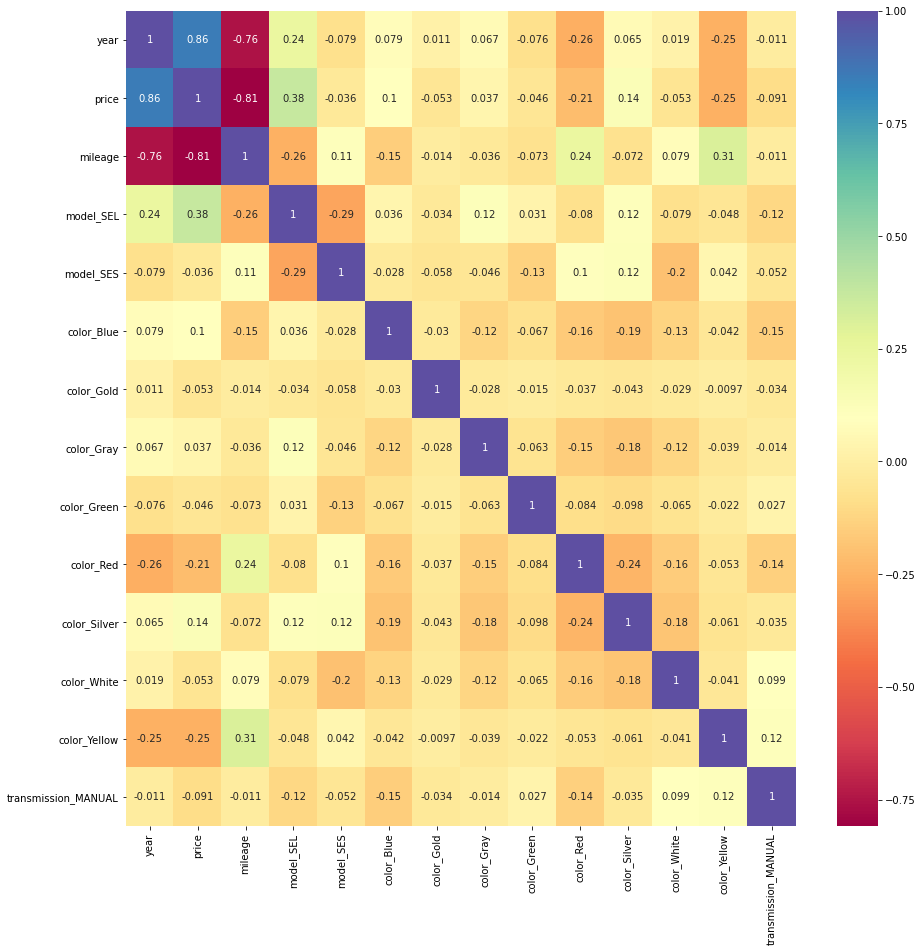

In [17]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cars_data.corr(),cmap="Spectral",ax=ax,annot=True)

* year and price are having high positive correlation. 

* mileage and price are high negative corrlation. 

* year and mileage are having high negative correlation.


##Separate the features from labels



In [18]:
#getting the features and labels and finally splitting the test and train data.

X = cars_data[['year','mileage', 'model_SEL', 'model_SES',
     'color_Blue', 'color_Gold', 'color_Gray', 'color_Green',
       'color_Red', 'color_Silver', 'color_White', 'color_Yellow',
       ]]
Y = cars_data['price']

##Splitting the dataset

In [19]:
#Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
#Splitting the train set into  dev set and training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)

##Normalizing the train and test data separately

In [20]:
scaler = preprocessing.MinMaxScaler()
# MinMaxScalar has been used here. You can go ahead and use the other scalars available and chcek the effect on the results.
#fitting the transform on test and train separately
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)

# create target scaler object

target_scaler = preprocessing.MinMaxScaler()
y_train = target_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = target_scaler.fit_transform(y_test.values.reshape(-1,1))
y_val=target_scaler.fit_transform(y_val.values.reshape(-1,1))


In [21]:
#Printing the data after normalization
X_val

array([[0.5       , 0.29413635, 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.5       , 0.54740804, 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [0.8333435 , 0.0132139 , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        ],
       [0.6666565 , 0.39601994, 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [0.6666565 , 0.41509432, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.5       , 0.740439  , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ,

##Converting the Numpy array into tensors 

In [22]:
# let us now convert the data elements into tensors as we need tensors to be fed into different tensorflow based operations
#X-train and X_test were converted to numpy arrays while transformations while the other two need to be transformed into numpy arrays.
X_train1=tf.convert_to_tensor(X_train)
y_train1=tf.convert_to_tensor(y_train)
X_test1=tf.convert_to_tensor(X_test)
y_test1=tf.convert_to_tensor(y_test)
X_val1=tf.convert_to_tensor(X_val)
y_val1=tf.convert_to_tensor(y_val)

In [23]:
#printing the shape of training tensor
X_train1.shape[1]

12

##Model building

###TensorFlow implementation

#### Let us try modelling now. We will use a few concepts covered in the practice exercise shared with the course material.

In [24]:
input_dim = X_train1.shape[1]
output_dim = 1
learning_rate = 0.01

# Let us initialize the weights and bias variables. 
weights = tf.Variable(tf.zeros(shape=(input_dim, output_dim), dtype= tf.float32))
bias = tf.Variable(tf.ones(shape=(output_dim,), dtype= tf.float32))

def predict(features):
  return tf.matmul(features, weights) + bias # note that the matmul is matrix multiplication and is needed for calculating predictions

def compute_loss(y_true, predictions):
  return tf.reduce_mean(tf.square(y_true - predictions)) # mean square error

# Let us now define a function to train the model. We will call the other functions in function definition.
def train(x, y,x1,y1):
  with tf.GradientTape() as tape:
    predictions = predict(x)
    loss = compute_loss(y, predictions)
    
    dloss_dw, dloss_db = tape.gradient(loss, [weights, bias]) #note that we can pass lists as well here.
  weights.assign_sub(learning_rate * dloss_dw)
  bias.assign_sub(learning_rate * dloss_db)
  #calculating the validation loss
  predictions1 = predict(x1)
  v_loss = compute_loss(y1, predictions1)
  
  return loss,v_loss

#### Let us now call the train function with 1000 epochs

In [25]:
training_loss=[]
val_loss=[]

for epoch in range(1000):
  loss,v_loss = train(X_train1, y_train1,X_val1,y_val1)
  training_loss.append(loss)
  val_loss.append(v_loss)
  
  print('Epoch %d: Training Loss = %.4f, validation_loss= %.4f' % (epoch, float(loss),float(v_loss)))


print('Final Weights after 100 epochs:')
print('###############################################################################')
print(weights)

print('Final Bias after 100 epochs:')
print('###############################################################################')
print(bias)

Epoch 0: Training Loss = 0.2608, validation_loss= 0.2052
Epoch 1: Training Loss = 0.2448, validation_loss= 0.1932
Epoch 2: Training Loss = 0.2299, validation_loss= 0.1821
Epoch 3: Training Loss = 0.2162, validation_loss= 0.1720
Epoch 4: Training Loss = 0.2035, validation_loss= 0.1626
Epoch 5: Training Loss = 0.1918, validation_loss= 0.1541
Epoch 6: Training Loss = 0.1810, validation_loss= 0.1462
Epoch 7: Training Loss = 0.1710, validation_loss= 0.1390
Epoch 8: Training Loss = 0.1617, validation_loss= 0.1324
Epoch 9: Training Loss = 0.1532, validation_loss= 0.1263
Epoch 10: Training Loss = 0.1452, validation_loss= 0.1207
Epoch 11: Training Loss = 0.1379, validation_loss= 0.1156
Epoch 12: Training Loss = 0.1312, validation_loss= 0.1109
Epoch 13: Training Loss = 0.1249, validation_loss= 0.1066
Epoch 14: Training Loss = 0.1191, validation_loss= 0.1027
Epoch 15: Training Loss = 0.1137, validation_loss= 0.0991
Epoch 16: Training Loss = 0.1088, validation_loss= 0.0958
Epoch 17: Training Loss 

Epoch 253: Training Loss = 0.0280, validation_loss= 0.0430
Epoch 254: Training Loss = 0.0280, validation_loss= 0.0429
Epoch 255: Training Loss = 0.0279, validation_loss= 0.0428
Epoch 256: Training Loss = 0.0279, validation_loss= 0.0428
Epoch 257: Training Loss = 0.0278, validation_loss= 0.0427
Epoch 258: Training Loss = 0.0278, validation_loss= 0.0426
Epoch 259: Training Loss = 0.0277, validation_loss= 0.0426
Epoch 260: Training Loss = 0.0276, validation_loss= 0.0425
Epoch 261: Training Loss = 0.0276, validation_loss= 0.0424
Epoch 262: Training Loss = 0.0275, validation_loss= 0.0424
Epoch 263: Training Loss = 0.0275, validation_loss= 0.0423
Epoch 264: Training Loss = 0.0274, validation_loss= 0.0422
Epoch 265: Training Loss = 0.0274, validation_loss= 0.0422
Epoch 266: Training Loss = 0.0273, validation_loss= 0.0421
Epoch 267: Training Loss = 0.0273, validation_loss= 0.0421
Epoch 268: Training Loss = 0.0272, validation_loss= 0.0420
Epoch 269: Training Loss = 0.0272, validation_loss= 0.04

Epoch 516: Training Loss = 0.0182, validation_loss= 0.0321
Epoch 517: Training Loss = 0.0182, validation_loss= 0.0321
Epoch 518: Training Loss = 0.0182, validation_loss= 0.0320
Epoch 519: Training Loss = 0.0182, validation_loss= 0.0320
Epoch 520: Training Loss = 0.0182, validation_loss= 0.0320
Epoch 521: Training Loss = 0.0181, validation_loss= 0.0320
Epoch 522: Training Loss = 0.0181, validation_loss= 0.0320
Epoch 523: Training Loss = 0.0181, validation_loss= 0.0319
Epoch 524: Training Loss = 0.0181, validation_loss= 0.0319
Epoch 525: Training Loss = 0.0180, validation_loss= 0.0319
Epoch 526: Training Loss = 0.0180, validation_loss= 0.0319
Epoch 527: Training Loss = 0.0180, validation_loss= 0.0318
Epoch 528: Training Loss = 0.0180, validation_loss= 0.0318
Epoch 529: Training Loss = 0.0179, validation_loss= 0.0318
Epoch 530: Training Loss = 0.0179, validation_loss= 0.0318
Epoch 531: Training Loss = 0.0179, validation_loss= 0.0318
Epoch 532: Training Loss = 0.0179, validation_loss= 0.03

Epoch 751: Training Loss = 0.0141, validation_loss= 0.0286
Epoch 752: Training Loss = 0.0141, validation_loss= 0.0286
Epoch 753: Training Loss = 0.0141, validation_loss= 0.0286
Epoch 754: Training Loss = 0.0141, validation_loss= 0.0286
Epoch 755: Training Loss = 0.0141, validation_loss= 0.0286
Epoch 756: Training Loss = 0.0141, validation_loss= 0.0286
Epoch 757: Training Loss = 0.0141, validation_loss= 0.0286
Epoch 758: Training Loss = 0.0140, validation_loss= 0.0286
Epoch 759: Training Loss = 0.0140, validation_loss= 0.0286
Epoch 760: Training Loss = 0.0140, validation_loss= 0.0286
Epoch 761: Training Loss = 0.0140, validation_loss= 0.0285
Epoch 762: Training Loss = 0.0140, validation_loss= 0.0285
Epoch 763: Training Loss = 0.0140, validation_loss= 0.0285
Epoch 764: Training Loss = 0.0140, validation_loss= 0.0285
Epoch 765: Training Loss = 0.0140, validation_loss= 0.0285
Epoch 766: Training Loss = 0.0140, validation_loss= 0.0285
Epoch 767: Training Loss = 0.0139, validation_loss= 0.02

As you can see the loss is continuously decreasing which means  model is learning

Let's plot the training and validation loss

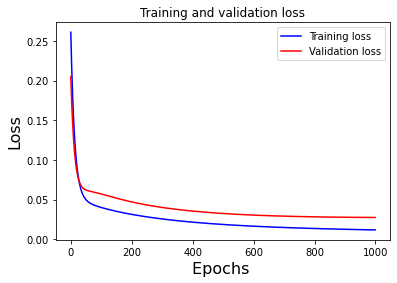

<Figure size 432x288 with 0 Axes>

In [26]:
plt.plot(range(len(training_loss)), training_loss, 'b', label='Training loss') #plotting training loss
plt.plot(range(len(val_loss)), val_loss, 'r', label='Validation loss') # plotting validation loss
plt.title('Training and validation loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

Above image shows plot of the training and validation loss. As you can see, lr model is not overfitting since validation and training loss is reducing gradually.

Let's us now test our model on the test data 

In [27]:
test_predictions = tf.matmul(X_test, weights) + bias
print(compute_loss(y_test, test_predictions))

tf.Tensor(0.019004088, shape=(), dtype=float32)


The testing loss is slightly higher than the training loss.  Let's check the R square to understand  how well the model has captured the variance of the dependent variable.

Let's predict

In [28]:
#Coverting tesnor to numpy array
test_predictions=np.array(test_predictions)

In [29]:
target_scaler.inverse_transform(test_predictions.reshape(-1, 1))

array([[13835.549],
       [12344.56 ],
       [14677.13 ],
       [13222.164],
       [13488.551],
       [13782.793],
       [13954.105],
       [14705.671],
       [14035.371],
       [14598.694],
       [15511.674],
       [16137.298],
       [14121.096],
       [15550.898],
       [13864.065],
       [15295.102],
       [14059.346],
       [13994.583],
       [12946.88 ],
       [13836.869],
       [13110.941],
       [12945.461],
       [15975.722],
       [10875.6  ],
       [12229.759],
       [14575.714],
       [13684.783],
       [14100.557],
       [13670.936],
       [10355.907]], dtype=float32)

 Let's check the R squared to understand  how well  model captured the variance of dependent variable.

In [30]:
sklearn.metrics.r2_score(target_scaler.inverse_transform(y_test.reshape(-1, 1)),target_scaler.inverse_transform(test_predictions.reshape(-1, 1)))

0.6415404802290545

R2 is  0.64 and it seems to be fine. But you cannot use R-squared to determine whether the coefficient estimates and predictions are biased, which is why you must assess the residual plots.

R-squared does not indicate if a regression model provides an adequate fit to your data. A good model can have a low R2 value. On the other hand, a biased model can have a high R2 value!

Let's plot the residual plot 

<AxesSubplot:>

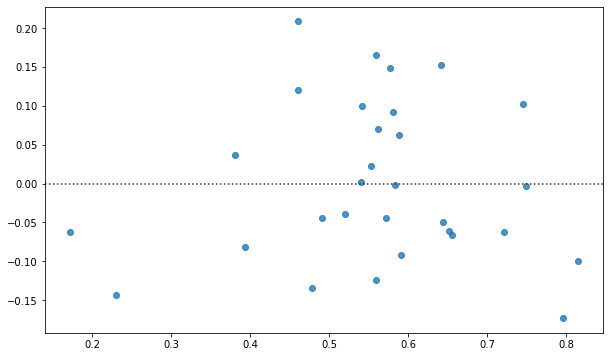

In [31]:
plt.figure(figsize=(10,6))
sns.residplot(x=test_predictions, y=y_test)

Above residual plot shows the random pattern around the baseline of 0 residual which means linear regression is a good choice for this Data 

##Keras Implementation

###Lets Build the model using keras

We’ll use a Sequential model with  multiple connected hidden layers, and an output layer that returns a single, continuous value.

**What Are Keras and tf.keras?**


Keras is an open-source deep learning library written in Python.

The project was started in 2015 by Francois Chollet. It quickly became a popular framework for developers, becoming one of, if not the most, popular deep learning libraries.

During the period of 2015-2019, developing deep learning models using mathematical libraries like TensorFlow, Theano, and PyTorch was cumbersome, requiring tens or even hundreds of lines of code to achieve the simplest tasks. The focus of these libraries was on research, flexibility, and speed, not ease of use.

Keras was popular because the API was clean and simple, allowing standard deep learning models to be defined, fit, and evaluated in just a few lines of code.

A secondary reason Keras took-off was because it allowed you to use any one among the range of popular deep learning mathematical libraries as the backend (e.g. used to perform the computation), such as TensorFlow, Theano, and later, CNTK. This allowed the power of these libraries to be harnessed (e.g. GPUs) with a very clean and simple interface.

In 2019, Google released a new version of their TensorFlow deep learning library (TensorFlow 2) that integrated the Keras API directly and promoted this interface as the default or standard interface for deep learning development on the platform.

This integration is commonly referred to as the tf.keras interface or API (“tf” is short for “TensorFlow“). This is to distinguish it from the so-called standalone Keras open source project.

**Standalone Keras** The standalone open source project that supports TensorFlow, Theano and CNTK backends.

**tf.keras** The Keras API integrated into TensorFlow 2.
The Keras API implementation in Keras is referred to as “tf.keras” because this is the Python idiom used when referencing the API. First, the TensorFlow module is imported and named “tf“; then, Keras API elements are accessed via calls to tf.keras; for example:

# example of tf.keras python 
import tensorflow as tf
# use keras API
model = tf.keras.Sequential()


### Building the model using tf.keras: 



In [32]:
def build_model_t():
  #Creating a sequential model with multiple dense layers
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=X_train.shape),
   
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.SGD(0.001)  # Defining the optimizer 

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=[ 'mse'])  # Defining the loss function, optimizer and metrices 
  return model

###Building the model using Keras standalone library

In [33]:
import tensorflow.keras as keras # importing keras library
from keras.models import Sequential  # importing the Sequential Model
from keras.layers import Dense       # importing Dense layer
def build_model():
  ## Initializing the ANN
    

  model = Sequential() 
  # This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
  input_layer = Dense(32, input_shape=(X_train.shape[1],),activation='relu')
  model.add(input_layer) # 
  #Adding the hidden layer
  # Notice that we do not need to specify input dim. 
  hidden_layer = Dense(64, activation='relu'); 
  model.add(hidden_layer) 
  #Adding the output layer
  # Notice that we do not need to specify input dim. 
  # we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
  # We use the sigmoid because we want probability outcomes
  output_layer = Dense(1,activation='relu') 
  
  model.add(output_layer)


  optimizer = keras.optimizers.RMSprop(0.001)  # Defining the optimizer 

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=[ 'mse'])  # Defining the loss function, optimizer and metrices 
  return model

Build the model and view the summary

In [34]:
#Getting the model summary. We are uisng standalone keras to build our model
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,593
Trainable params: 2,593
Non-trainable params: 0
_________________________________________________________________


Let’s now train the model for 100 epochs, and record the training and validation accuracy in ‘history’.

In [35]:
#Definign the number of epochs
EPOCHS = 100
#fitting the model
history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=1,)

Epoch 1/100
3/3 [==============================] - 0s 62ms/step - loss: 0.1693 - mse: 0.1693 - val_loss: 0.0901 - val_mse: 0.0901
Epoch 2/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0854 - mse: 0.0854 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 3/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0585 - mse: 0.0585 - val_loss: 0.0462 - val_mse: 0.0462
Epoch 4/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0448 - mse: 0.0448 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 5/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0351 - mse: 0.0351 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 6/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0301 - mse: 0.0301 - val_loss: 0.0237 - val_mse: 0.0237
Epoch 7/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 8/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0230 - mse: 0.023

Epoch 64/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 65/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 66/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 67/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 68/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 69/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 70/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 71/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0052 - ms

Let's plot the  validation and training loss

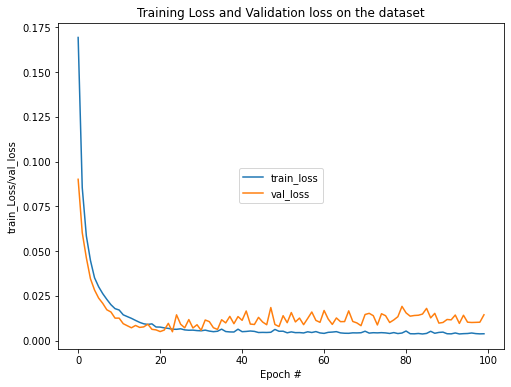

In [36]:

N = 100
import pylab as plt
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="center")
plt.show()


##Testing the model



In [37]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 15ms/step - loss: 0.0238 - mse: 0.0238


[0.023773470893502235, 0.023773470893502235]

Let’s predict


In [38]:
#Lets Print the predicted prices 
test_predictionsk=model.predict(X_test)
y_pred1=target_scaler.inverse_transform(test_predictionsk.reshape(-1, 1))

Let's Calculate the R2 to evaluate the model

In [39]:
sklearn.metrics.r2_score(target_scaler.inverse_transform(y_test.reshape(-1, 1)),y_pred1)

0.5515793914458966

R2 is 0.65 and it seems to be fine. But you cannot use R-square to determine whether the coefficient estimates and predictions are biased, which is why you must assess the residual plots.

R-squared does not indicate if a regression model provides an adequate fit to your data. A good model can have a low R2 value. On the other hand, a biased model can have a high R2 value!

<AxesSubplot:>

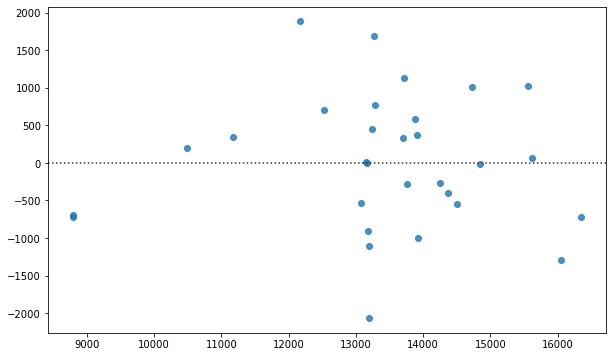

In [40]:
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred1, y=target_scaler.inverse_transform(y_test.reshape(-1, 1)))

**Conclusion:** 

Cars which are manufactured recently are costly and have  less mileage.

Price of car is highly dependent on the mileage and the manufacturing year

Automatic cars have higher price range than manual type cars. 

There is an increment in price of automatic cars between 2010 and 2015. 





We learnt creating a very simple linear regression model on cars data and predicted prices. 



<i>Happy Learning!</i>